## Covid Forecast with PyMC3

### Obtaining and Filtering the Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

confirmed_cases_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed_cases = pd.read_csv(confirmed_cases_url, sep=',')
deaths_url =  'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
deaths = pd.read_csv(deaths_url, sep=',')
path_to_save = ''
confirmed_cases

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,38572,38606,38641,38716,38772,38815,38855,38872,38883,38919
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,10860,11021,11185,11353,11520,11672,11816,11948,12073,12226
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,47488,47752,48007,48254,48496,48734,48966,49194,49413,49623
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,1301,1344,1344,1344,1438,1438,1483,1483,1564,1564
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,3217,3279,3335,3388,3439,3569,3675,3789,3848,3901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,28664,29256,29906,30574,31362,32250,33006,33843,34401,35003
262,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2003,2007,2009,2011,2013,2016,2019,2022,2024,2026
264,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,13214,13323,13466,13539,13720,13819,13887,13928,14022,14070


In [4]:
confirmed_cases[confirmed_cases['Country/Region'] == 'China']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20
56,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,...,991,991,991,991,991,991,991,991,991,991
57,Beijing,China,40.1824,116.4142,14,22,36,41,68,80,...,935,935,935,935,935,935,935,935,935,935
58,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,...,584,584,584,584,584,584,584,584,584,584
59,Fujian,China,26.0789,117.9874,1,5,10,18,35,59,...,387,388,388,390,390,392,392,393,394,395
60,Gansu,China,35.7518,104.2861,0,2,2,4,7,14,...,170,170,170,170,170,170,170,170,170,170
61,Guangdong,China,23.3417,113.4244,26,32,53,78,111,151,...,1774,1776,1777,1778,1782,1783,1784,1787,1793,1797
62,Guangxi,China,23.8298,108.7881,2,5,23,23,36,46,...,257,257,258,258,258,258,258,258,258,258
63,Guizhou,China,26.8154,106.8748,1,3,3,4,5,7,...,147,147,147,147,147,147,147,147,147,147
64,Hainan,China,19.1959,109.7453,4,5,8,19,22,33,...,171,171,171,171,171,171,171,171,171,171
65,Hebei,China,39.5490,116.1306,1,1,2,8,13,18,...,365,365,365,365,365,365,365,365,365,365


In [101]:
import pymc3 as pm
import theano.tensor as tt
import theano
import datetime
import time

data_end   = '3/15/20' #Take the data until yesterday
data_begin = '3/1/20'
num_days_to_predict = 28

cases_country = confirmed_cases.loc[confirmed_cases["Country/Region"] == "Germany"]

cases_obs = np.array(
    confirmed_cases.loc[confirmed_cases["Country/Region"] == "Germany", data_begin:data_end]
)[0]

date_data_end = confirmed_cases.loc[confirmed_cases["Country/Region"] == "Germany", data_begin:data_end].columns[-1]
month, day, year = map(int,date_data_end.split('/'))
date_data_end = datetime.date(year+2000, month, day)
date_today = date_data_end + datetime.timedelta(days=1)
print('Cases yesterday ({}): {} and day before yesterday: {}'.format(date_data_end.isoformat(), *cases_obs[:-3:-1]))
num_days = len(cases_obs)
np.random.seed(0)


Cases yesterday (2020-03-15): 5795 and day before yesterday: 4585


### Modeling Covid with PyMC3

Cases yesterday (2020-03-15): 5795 and day before yesterday: 4585


/Users/srijith.rajamohan/opt/anaconda3/envs/compstats_env/lib/python3.8/site-packages/theano/scan_module/scan_perform_ext.py:75: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  warnings.warn(
/Users/srijith.rajamohan/opt/anaconda3/envs/compstats_env/lib/python3.8/site-packages/theano/scan_module/scan_perform_ext.py:75: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  warnings.warn(
Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO

Model run in 46.50 s


/Users/srijith.rajamohan/opt/anaconda3/envs/compstats_env/lib/python3.8/site-packages/theano/scan_module/scan_perform_ext.py:75: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  warnings.warn(
/Users/srijith.rajamohan/opt/anaconda3/envs/compstats_env/lib/python3.8/site-packages/theano/scan_module/scan_perform_ext.py:75: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  warnings.warn(
/Users/srijith.rajamohan/opt/anaconda3/envs/compstats_env/lib/python3.8/site-packages/arviz/plots/traceplot.py:164: Syntax

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff362e14070>,
      dtype=object)

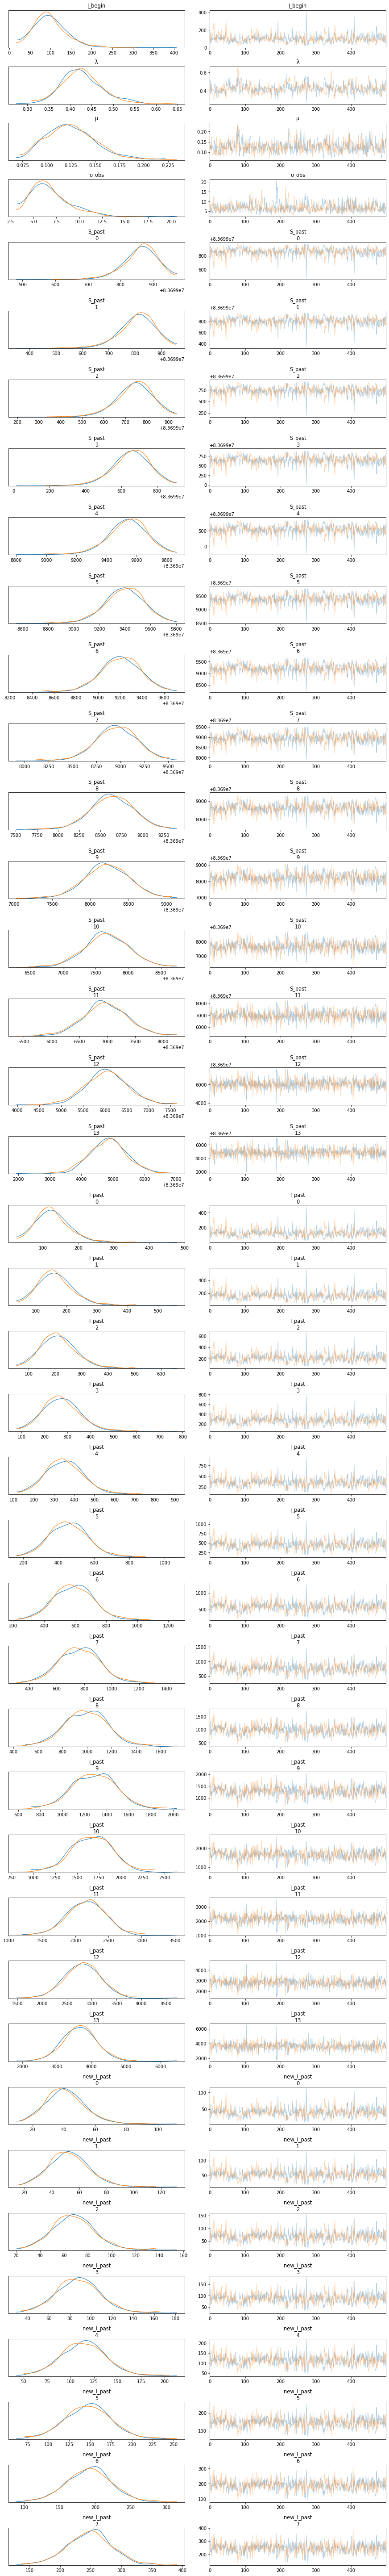

In [69]:
%matplotlib inline
import pymc3 as pm
import arviz as az
import theano.tensor as tt
import theano
import datetime
import time

data_end   = '3/15/20' #Take the data until yesterday
data_begin = '3/1/20'
num_days_to_predict = 28

cases_obs = np.array(
    confirmed_cases.loc[confirmed_cases["Country/Region"] == "Germany", data_begin:data_end]
)[0]
date_data_end = confirmed_cases.loc[confirmed_cases["Country/Region"] == "Germany", data_begin:data_end].columns[-1]
month, day, year = map(int,date_data_end.split('/'))
date_data_end = datetime.date(year+2000, month, day)
date_today = date_data_end + datetime.timedelta(days=1)
print('Cases yesterday ({}): {} and day before yesterday: {}'.format(date_data_end.isoformat(), *cases_obs[:-3:-1]))
num_days = len(cases_obs)
np.random.seed(0)

# ------------------------------------------------------------------------------ #
# model setup and training
# ------------------------------------------------------------------------------ #

def SIR_model(λ, μ, S_begin, I_begin, N):
    new_I_0 = tt.zeros_like(I_begin)
    def next_day(λ, S_t, I_t, _):
        new_I_t = λ/N*I_t*S_t              # new_I_t is delta I_t or infected during the period
                                           # t and t-1
        S_t = S_t - new_I_t
        I_t = I_t + new_I_t - μ * I_t      # I_t is the total infected at time t
        return S_t, I_t, new_I_t     
    outputs , _  = theano.scan(fn=next_day, sequences=[λ], 
                               outputs_info=[S_begin, I_begin, new_I_0])
    S_all, I_all, new_I_all = outputs
    return S_all, I_all, new_I_all

with pm.Model() as model:
    # true cases at begin of loaded data but we do not know the real number
    I_begin = pm.Lognormal("I_begin", mu=np.log(cases_obs[0]), sigma=0.9)

    # fraction of people that are newly infected each day
    λ = pm.Lognormal("λ", mu=np.log(0.4), sigma=0.5)

    # fraction of people that recover each day, recovery rate mu
    μ = pm.Lognormal('μ', mu=np.log(1/8), sigma=0.2)

    # prior of the error of observed cases
    σ_obs = pm.HalfCauchy("σ_obs", beta=1)

    N_germany = 83.7e6   # Population of the country

    # -------------------------------------------------------------------------- #
    # training the model with loaded data
    # -------------------------------------------------------------------------- #

    S_begin = N_germany - I_begin  # This is an estimate, we don't know the real I_begin
    
    S_past, I_past, new_I_past = SIR_model(λ=λ * tt.ones(num_days-1), μ=μ, 
                                               S_begin=S_begin, I_begin=I_begin,
                                               N=N_germany)
    new_infections_obs = np.diff(cases_obs) # delta cases per day or new infections per day

    # Approximates Poisson
    # calculate the likelihood of the model:
    # observed cases are distributed following studentT around the model

    pm.StudentT(
        "obs",
        nu=4,
        mu=new_I_past,                   # distribution mean around what it should be based on SIR
        sigma=new_I_past ** 0.5 * σ_obs,
        observed=new_infections_obs
        )  
    
    S_past = pm.Deterministic('S_past', S_past)
    I_past = pm.Deterministic('I_past', I_past)
    new_I_past = pm.Deterministic('new_I_past', new_I_past)

    # -------------------------------------------------------------------------- #
    # prediction, start with no changes in policy
    # -------------------------------------------------------------------------- #
    
    # delay in days between contracting the disease and being recorded
    delay = pm.Lognormal("delay", mu=np.log(8), sigma=0.1)

    S_begin = S_past[-1]
    I_begin = I_past[-1]
    forecast_no_change = SIR_model(λ=λ*tt.ones(num_days_to_predict), μ=μ, 
                        S_begin=S_begin, I_begin=I_begin, N=N_germany)
    S_no_change, I_no_change, new_I_no_change = forecast_no_change

    #saves the variables for later retrieval
    pm.Deterministic('S_no_change', S_no_change)
    pm.Deterministic('I_no_change', I_no_change)
    pm.Deterministic('new_I_no_change', new_I_no_change)

    
    # -------------------------------------------------------------------------- #
    # run model, pm trains and predicts when calling this
    # -------------------------------------------------------------------------- #

    time_beg = time.time()
    trace = pm.sample(draws=500, tune=800, chains=2)
    print("Model run in {:.2f} s".format(time.time() - time_beg))
    
az.plot_trace(trace)

In [76]:
az.summary(trace, var_names=['new_I_no_change'])

/Users/srijith.rajamohan/opt/anaconda3/envs/compstats_env/lib/python3.8/site-packages/theano/scan_module/scan_perform_ext.py:75: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  warnings.warn(


,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
new_I_no_change[0],1561.915,279.505,1040.496,2053.534,9.882,6.990,800.0,800.0,712.0,741.0,1.0
new_I_no_change[1],2040.278,419.970,1367.456,2870.443,15.820,11.191,705.0,705.0,634.0,741.0,1.0
new_I_no_change[2],2667.928,628.514,1582.900,3788.289,24.985,17.675,633.0,633.0,583.0,681.0,1.0
new_I_no_change[3],3492.348,934.973,1962.760,5193.396,38.626,27.326,586.0,586.0,533.0,667.0,1.0
new_I_no_change[4],4576.417,1382.075,2263.840,6959.602,58.881,41.657,551.0,551.0,500.0,624.0,1.0
new_I_no_change[5],6003.486,2030.888,2747.265,9494.872,88.043,62.290,532.0,532.0,479.0,533.0,1.0
new_I_no_change[6],7884.163,2968.566,2889.497,12485.894,130.786,92.532,515.0,515.0,461.0,490.0,1.0
new_I_no_change[7],10365.364,4319.321,3529.046,17064.774,192.659,136.310,503.0,503.0,452.0,473.0,1.0
new_I_no_change[8],13642.394,6259.941,4201.565,23497.954,281.859,199.422,493.0,493.0,445.0,473.0,1.0
new_I_no_change[9],17975.067,9041.649,5331.511,32407.127,409.993,290.083,486.0,486.0,440.0,467.0,1.0


In [119]:
future_days = np.array(cases_country.loc[:,'3/16/20':'4/12/20'])[0]
print(future_days)

[  7272   9257  12327  15320  19848  22213  24873  29056  32986  37323
  43938  50871  57695  62095  66885  71808  77872  84794  91159  96092
 100123 103374 107663 113296 118181 122171 124908 127854]


### Forecast cases into the future

The number of days predicted depends on the variable 'num_days_to_predict' that is set. This uses the uncertainty from the MCMC simulation to give us estimates for the confidence intervals

Text(0.5, 1.0, 'Forecast for Daily Infections in Log scale')

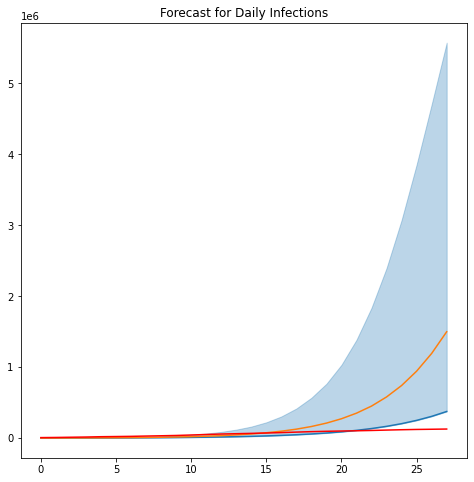

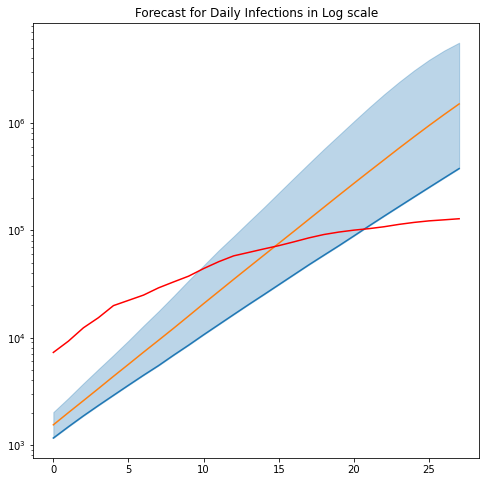

In [125]:
plt.figure(figsize=(8,8))
days = np.arange(0, num_days_to_predict)
percentiles = np.percentile(trace.new_I_no_change, q=5.0, axis=0), np.percentile(trace.new_I_no_change, q=95.0, axis=0)
plt.fill_between(days, percentiles[0], percentiles[1], alpha=0.3, color='tab:blue')
plt.plot(days, percentiles[0],np.median(trace.new_I_no_change, axis=0), label='Forecasted Daily Infections')
plt.plot(days, future_days, 'r')
plt.title('Forecast for Daily Infections')

plt.figure(figsize=(8,8))
plt.fill_between(days, percentiles[0], percentiles[1], alpha=0.3, color='tab:blue')
plt.plot(days, percentiles[0],np.median(trace.new_I_no_change, axis=0), label='Forecasted Daily Infections')
plt.plot(days, future_days, 'r')
plt.yscale("log")
plt.title('Forecast for Daily Infections in Log scale')

In [87]:
print(percentiles)
print(np.median(trace['new_I_no_change'], axis=0))

(array([  1160.14543074,   1476.84401526,   1865.48773572,   2331.21012106,
         2898.62402961,   3600.16826974,   4460.31784045,   5486.40922354,
         6855.32586417,   8501.4302699 ,  10626.8386678 ,  13199.60509826,
        16395.17344201,  20332.13997876,  25092.95447946,  31060.73176785,
        38450.91984404,  47589.70816224,  58466.86848557,  71715.58845626,
        88522.33979138, 109512.8134872 , 134994.74967149, 165943.21340717,
       203840.50918581, 250152.30399711, 306615.28401775, 375265.76771525]), array([2.02198145e+03, 2.73362644e+03, 3.74591991e+03, 5.08318467e+03,
       6.87155905e+03, 9.36023346e+03, 1.28970548e+04, 1.75940987e+04,
       2.43520671e+04, 3.40224919e+04, 4.69385285e+04, 6.48948532e+04,
       8.78307727e+04, 1.19781146e+05, 1.62691104e+05, 2.23043591e+05,
       3.05647824e+05, 4.17640781e+05, 5.69029756e+05, 7.66705020e+05,
       1.03380379e+06, 1.38617206e+06, 1.83807414e+06, 2.39759105e+06,
       3.07476582e+06, 3.85665657e+06, 4.70437

In [21]:
cases_obs

array([ 130,  159,  196,  262,  482,  670,  799, 1040, 1176, 1457, 1908,
       2078, 3675, 4585, 5795])

In [23]:
np.diff(cases_obs)

array([  29,   37,   66,  220,  188,  129,  241,  136,  281,  451,  170,
       1597,  910, 1210])

### Test the SIR_model function

1. Create the variables by assigning a datatype
2. Assign a test value since theano performs lazy evaluation and therefore cannot be evaulauted uness you use
    a. .eval() method
    
    b. test_value to intiialize a variable and run it, values can be assigned from a numpy array by casting it with '.astype(THEANO_DATATYPE)' 
3. Print the variable value using 'theano.printing.Print'

In [55]:
from theano import tensor
theano.config.compute_test_value = 'warn'
I_begin = tensor.dscalar('I_begin')
I_begin.tag.test_value = np.log(cases_obs[0]).astype(theano.config.floatX)
S_begin = tensor.dscalar('S_begin')
S_begin = N_germany - I_begin
print(S_begin)

Elemwise{sub,no_inplace}.0


In [56]:
λ = tensor.dscalar('λ')
λ.tag.test_value = np.log(0.4).astype(theano.config.floatX)
μ = tensor.dscalar('μ')
μ.tag.test_value = np.log(1/8).astype(theano.config.floatX)

In [68]:
S_past, I_past, new_I_past = SIR_model(λ=λ * tt.ones(num_days-1), μ=μ, S_begin=S_begin, 
                                       I_begin=I_begin,
                                       N=N_germany)
theano.printing.Print('Value of S_past')(S_past)
theano.printing.Print('Value of I_past')(I_past)
theano.printing.Print('Value of new_I_past')(new_I_past)

Value of S_past __str__ = [83699999.59254201 83700009.24036074 83700030.11005007 83700075.2543446
 83700172.90829967 83700384.14869766 83700841.094289   83701829.53998952
 83703967.71325564 83708592.97981322 83718598.48085828 83740243.53420354
 83787072.74621125 83888407.3997477 ]
Value of I_past __str__ = [1.05292113e+01 2.27762721e+01 4.92685091e+01 1.06575199e+02
 2.30538141e+02 4.98688329e+02 1.07873597e+03 2.33345865e+03
 5.04757622e+03 1.09184493e+04 2.36172255e+04 5.10828118e+04
 1.10477321e+05 2.38873797e+05]
Value of new_I_past __str__ = [-4.46007644e+00 -9.64781872e+00 -2.08696893e+01 -4.51442945e+01
 -9.76539551e+01 -2.11240398e+02 -4.56945591e+02 -9.88445701e+02
 -2.13817327e+03 -4.62526656e+03 -1.00055010e+04 -2.16450533e+04
 -4.68292120e+04 -1.01334654e+05]


/Users/srijith.rajamohan/opt/anaconda3/envs/compstats_env/lib/python3.8/site-packages/theano/scan_module/scan_perform_ext.py:75: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  warnings.warn(


Print{message='Value of new_I_past', attrs=('__str__',), global_fn=<function _print_fn at 0x7ff3883a9820>}.0

In [45]:
I_begin = tensor.dscalar('I_begin')
I_begin.eval({I_begin: np.log(cases_obs[0])})

array(4.86753445)

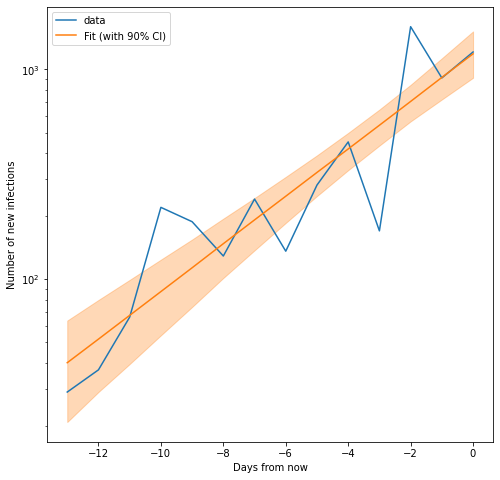

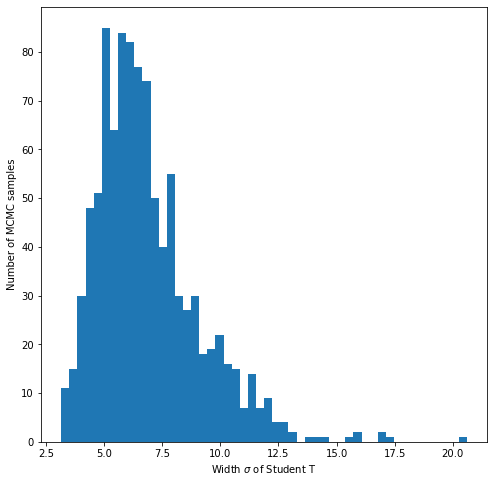

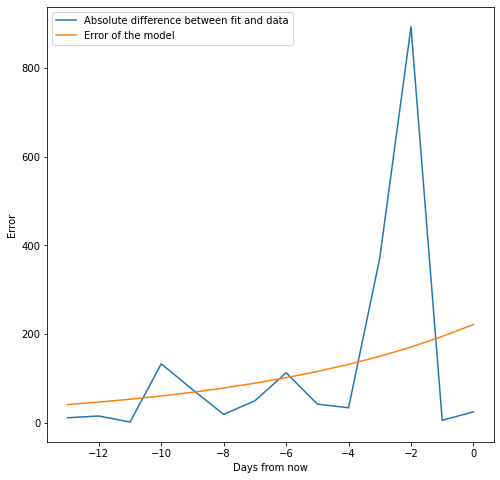

In [95]:
# Plot the daily new infections computed using SIR (using the inferred parameter distribution)
# against the true values. We have the true values since this is for the last 'n' days that we fit.

time = np.arange(-len(cases_obs)+2, 1)
plt.figure(figsize=(8,8))
plt.plot(time, np.diff(cases_obs), label='data')
percentiles = np.percentile(trace.new_I_past, q=5.0, axis=0), np.percentile(trace.new_I_past, q=95.0, axis=0)
plt.plot(time, np.median(trace.new_I_past, axis=0),color='tab:orange', label='Fit (with 90% CI)')
plt.fill_between(time, percentiles[0], percentiles[1], alpha=0.3, color='tab:orange')
plt.yscale('log')
plt.ylabel('Number of Daily new infections')
plt.xlabel('Days')
plt.legend()

# The likelihood for new cases of daily infections is drawn from a Student-t distribution
# The sigma is a (width) parameter that characterizes the distribution from which the 
# number of daily new cases are drawn.
# Hence, error for this variable new_daily_cases is quantified as 
# sigma = the value sigma_obs * sqrt(I)
# We plot the distribution of sigma_obs as a histogram
# We plot sigma as a line plot over time to see how it evolves


plt.figure(figsize=(8,8))
plt.hist(trace.σ_obs, bins=50)
plt.ylabel('Number of MCMC samples')
plt.xlabel('Width $\sigma_{obs}$ of Student T')

plt.figure(figsize=(8,8))
plt.plot(time, np.abs(np.median(trace.new_I_past, axis=0) - np.diff(cases_obs)),
         label='Absolute difference between fit and data')
plt.plot(time, np.sqrt(np.median(trace.new_I_past, axis=0))*np.median(trace.σ_obs, axis=0),
         label='Error of the model')
plt.ylabel('Error')
plt.xlabel('Days from now')
plt.legend(loc='upper left')

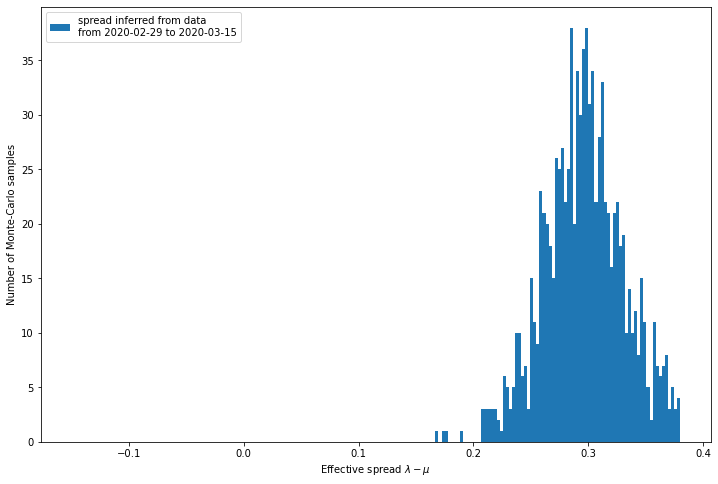

In [128]:
import matplotlib

day_begin = date_data_end - datetime.timedelta(days = num_days)

plt.figure(figsize=(12,8))
bins = np.linspace(-0.15, 0.38, 200)
plt.hist(trace.λ - trace.μ, bins=bins, 
         label='spread inferred from data\nfrom {} to {}'.format(day_begin.isoformat(), date_data_end.isoformat()))

plt.xlabel('Effective spread $\lambda - \mu$')
plt.ylabel('Number of Monte-Carlo samples')
plt.legend()


effective m: 1.298 +- 0.041


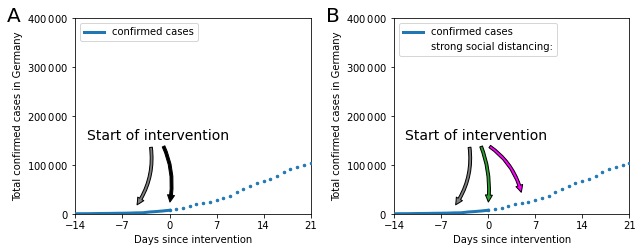

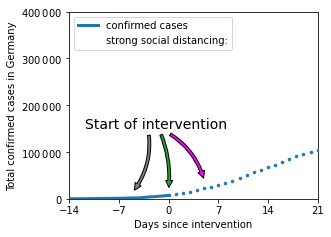

In [75]:
legends_lang = {
    "english": [
        # bottom left
        "confirmed cases",
        [
            "uncontrolled spreading",
            "mild social distancing",
            "strong social distancing",
            "strong social distancing\nstarting at day -5",
        ],
        "Days since intervention",
        "Total confirmed cases in Germany",
        "Start of intervention",
        # bottom right
        'confirmed cases',['strong social distancing:',
                           '  starting at day 0', 
                           '  starting at day 5',
                           "  starting at day -5"],
        'Days since intervention',
        'Total confirmed cases in Germany',
        'Start of intervention',
    ],
}

obs_cases_labels = ['new_I_no_change']

date_today_formatted = '{}/{}/{}'.format(date_today.month, date_today.day, str(date_today.year)[2:4])
cases_obs_to_plot = np.array(confirmed_cases.loc[confirmed_cases['Country/Region'] == 'Germany', '1/22/20':date_today_formatted])[0]
cases_obs_to_plot_future = np.array(confirmed_cases.loc[confirmed_cases['Country/Region'] == 'Germany', date_today_formatted:])[0]


def return_obs_cases_future(trace):
  obs_cases_future = dict()
  for label in obs_cases_labels:
    obs_cases_future[label] = np.cumsum(trace[label], axis=1) + \
        np.sum(trace.new_I_past, axis=1)[:, None] + trace.I_begin[:, None]
    obs_cases_future[label] = obs_cases_future[label].T
  return obs_cases_future

obs_cases_labels_local = obs_cases_labels[:]
obs_cases_labels_local.pop(0)

for lang, legends_list in legends_lang.items():
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[9, 3.6])

    # bottom left
    colors = ["tab:red", "tab:orange", "tab:green", "gray"]
    dict_obsc_cases = return_obs_cases_future(trace)
    ax = axes[0]

    time = np.arange(-len(cases_obs_to_plot)+1, 1)
    ax.plot(time, cases_obs_to_plot, label=legends_list[0], linewidth=3, color='tab:blue', 
                zorder=5)
    time = np.arange(0, len(cases_obs_to_plot_future))
    ax.plot(time, cases_obs_to_plot_future, '.', markersize=5, color='tab:blue', 
            zorder=5)


    for label, color, legend in zip(obs_cases_labels_local, colors, legends_list[1]):
        time = np.arange(0, num_days_to_predict)
        cases = dict_obsc_cases[label]
        #cases = np.concatenate([np.ones((1,cases.shape[1]))*cases_obs[-1], cases], axis=0)

        median = np.median(cases, axis=-1)
        percentiles = (
            np.percentile(cases, q=2.5, axis=-1),
            np.percentile(cases, q=97.5, axis=-1),
        )
        ax.plot(time, median, color, linewidth=3, label=legend)
        ax.fill_between(time, percentiles[0], percentiles[1], alpha=0.08, color=color)

    ax.set_xlim(-14, 21)
    ax.set_ylim(0, 400_000)
    ax.set_yscale("linear")
    ax.set_xlabel(legends_list[2])
    ax.set_ylabel(legends_list[3])
    # ax.locator_params(axis='y', nbins=4)
    ax.legend(loc="upper left")
    ax.set_xticks([-14, -7, 0, 7, 14, 21])
    ax.locator_params(nbins=4, axis="y")
    func_format = lambda num, _: "${:,.0f}$".format(num).replace(",", "\,")
    ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(func_format))
    ax.text(-0.29, 0.98, "A", transform=ax.transAxes, size=20)

    ax.annotate(
        legends_list[4],
        xy=(0.0, 20_000),
        xycoords="data",
        xytext=(0.35, 0.4),
        textcoords="axes fraction",
        size=14,
        va="center",
        ha="center",
        arrowprops=dict(
            arrowstyle="simple", connectionstyle="arc3,rad=-0.2", fc="black"
        ),
    )

    ax.annotate(
        "",
        xy=(-5.0, 15_000),
        xycoords="data",
        xytext=(0.32, 0.35),
        textcoords="axes fraction",
        size=14,
        va="center",
        ha="center",
        arrowprops=dict(
            arrowstyle="simple", connectionstyle="arc3,rad=-0.2", fc=colors[3]
        ),
    )

    # bottom right

    f_alone, ax_alone = plt.subplots(figsize=(4.7,3.4))
    for i, (ax, f) in enumerate(((axes[1],fig), (ax_alone, f_alone))):
        colors = ["tab:green", "fuchsia", 'gray']
        time = np.arange(-len(cases_obs_to_plot)+1, 1)
        ax.plot(time, cases_obs_to_plot, label=legends_list[5], linewidth=3, color='tab:blue', 
                    zorder=5)
        time = np.arange(0, len(cases_obs_to_plot_future))
        ax.plot(time, cases_obs_to_plot_future, '.', markersize=5, color='tab:blue', 
                zorder=5)
        time = np.arange(-len(cases_obs) + 1, 1)

        dict_obsc_cases = return_obs_cases_future(trace)
        ax.plot([], [], alpha=0, label=legends_list[6][0])
        for label, color, legend in zip(obs_cases_labels[2:], colors, legends_list[6][1:]):
            time = np.arange(num_days_to_predict)
            cases = dict_obsc_cases[label]
            #cases = np.concatenate(
            #    [np.ones((1, cases.shape[1])) * cases_obs[-1], cases], axis=0
            #)
            median = np.median(cases, axis=-1)
            percentiles = (
                np.percentile(cases, q=2.5, axis=-1),
                np.percentile(cases, q=97.5, axis=-1),
            )
            ax.plot(time, median, color, linewidth=3, label=legend)
            ax.fill_between(time, percentiles[0], percentiles[1], alpha=0.08, color=color)

        ax.set_xlim(-14, 21)
        ax.set_ylim(0, 400_000)
        ax.set_yscale("linear")
        ax.set_xlabel(legends_list[7])
        ax.set_ylabel(legends_list[8])
        ax.locator_params(axis="y", nbins=4)
        ax.legend(loc="upper left")
        ax.set_xticks([-14, -7, 0, 7, 14, 21])
        func_format = lambda num, _: "${:,.0f}$".format(num).replace(",", "\,")
        ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(func_format))

        ax.annotate(
            legends_list[9],
            xy=(0.0, 20_000),
            xycoords="data",
            xytext=(0.35, 0.4),
            textcoords="axes fraction",
            size=14,
            va="center",
            ha="center",
            arrowprops=dict(
                arrowstyle="simple", connectionstyle="arc3,rad=-0.15", fc=colors[0]
            ),
        )
        ax.annotate(
            "",
            xy=(5.0, 40_000),
            xycoords="data",
            xytext=(0.4, 0.35),
            textcoords="axes fraction",
            size=14,
            va="center",
            ha="center",
            arrowprops=dict(
                arrowstyle="simple", connectionstyle="arc3,rad=-0.2", fc=colors[1]
            ),
        )

        ax.annotate(
            "",
            xy=(-5.0, 15_000),
            xycoords="data",
            xytext=(0.32, 0.35),
            textcoords="axes fraction",
            size=14,
            va="center",
            ha="center",
            arrowprops=dict(
                arrowstyle="simple", connectionstyle="arc3,rad=-0.2", fc=colors[2]
            ),
        )
        if i == 0:
            axes[1].text(-0.29, 0.98, "B", transform=ax.transAxes, size=20)

        f.tight_layout()


print('effective m: {:.3f} +- {:.3f}'.format(1+np.median(trace.λ - trace.μ), np.std(trace.λ - trace.μ)))